In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [18]:
# P1 - Determine an approximate mathematical equation for curve B. 

temps = np.linspace(0., 60., 200)

# Points from graph
growth_temps = np.array([5., 10., 22., 30., 40.])
growth_vals = np.array([0., 45., 100., 82., 0.])

# Calculate 3rd order polynomial fit
p_b = np.polyfit(growth_temps, growth_vals, 3)
curve_b = np.polyval(p_b, temps)
with np.printoptions(precision=2, suppress=True):
    print(p_b)
    

[ -0.    -0.25  13.22 -60.28]


In [19]:
# P2 - Assume curves A and A1 can be approximated by straight lines. Come up with the equations
# for those two curves.

# Points from graph
a_temps = np.array([0., 47.])
a_vals = np.array([100., 0.])

a1_temps = np.array([0., 40.])
a1_vals = np.array([80., 0.])

# Calculate 1st order polynomial fits
p_a = np.polyfit(a_temps, a_vals, 1)
curve_a = np.polyval(p_a, temps)

p_a1 = np.polyfit(a1_temps, a1_vals, 1)
curve_a1 = np.polyval(p_a1, temps)
with np.printoptions(precision=2, suppress=True):
    print(p_a, p_a1)

[ -2.13 100.  ] [-2. 80.]


In [20]:
# P3 and 4 Calculate intersection of points

def find_intersections(curve_a, curve_b):
    """
    Find intersections of growth curves
    
    :param curve_a: 
    :param curve_b: 
    :return: 
    """
    
    # https://stackoverflow.com/questions/28766692/intersection-of-two-graphs-in-python-find-the-x-value
    x_vals = np.argwhere(np.diff(np.sign(curve_a - curve_b))).flatten()
    
    return x_vals

a_x_vals = find_intersections(curve_a, curve_b)
a1_x_vals = find_intersections(curve_a1, curve_b)

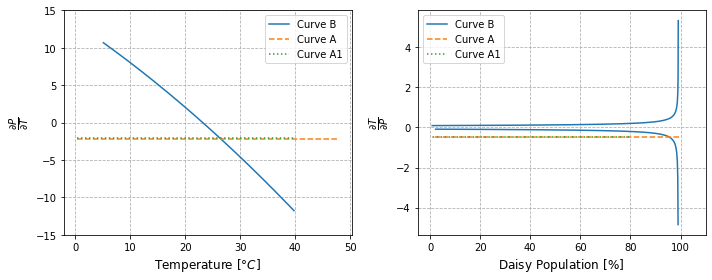

In [21]:
# P5 partial derivatives

b_diff = np.diff(curve_b)
a_diff = np.diff(curve_a)
a1_diff = np.diff(curve_a1)
temp_diff = np.diff(temps)

# dp/dt
db_dt = b_diff / temp_diff
da_dt = a_diff / temp_diff
da1_dt = a1_diff / temp_diff

# dt/dp
dt_db = temp_diff / b_diff
dt_db = np.where(dt_db < -30., np.nan, dt_db)
dt_da =  temp_diff / a_diff
dt_da1 = temp_diff / a1_diff

fig, (ax1, ax2) = plt.subplots(ncols=2,**{'figsize':(10, 4)})

ax1.plot(np.where(np.logical_and(5. < temps[1:], temps[1:] < 40.), temps[1:], np.nan), db_dt, label=r'Curve B')
ax1.plot(np.where(np.logical_and(0. < temps[1:], temps[1:] < 48.), temps[1:], np.nan), da_dt, ls= '--', label=r'Curve A')
ax1.plot(np.where(np.logical_and(0. < temps[1:], temps[1:] < 40.), temps[1:], np.nan), da1_dt, ls = ':', label=r'Curve A1')

ax1.legend()
ax1.grid(ls='--')
ax1.set_ylim(-15,15)
ax1.set_ylabel(r'$\frac{\partial P}{\partial T}$', fontsize='x-large')
ax1.set_xlabel(r'Temperature [$\degree C$]', fontsize='large')

ax2.plot(np.where(curve_b[1:] > 0, curve_b[1:], np.nan), dt_db, label=r'Curve B')
ax2.plot(np.where(curve_a[1:] > 0, curve_a[1:], np.nan), dt_da, ls= '--', label=r'Curve A')
ax2.plot(np.where(curve_a1[1:] > 0, curve_a1[1:], np.nan), dt_da1, ls = ':', label=r'Curve A1')

ax2.legend()
ax2.grid(ls='--')
#ax2.set_ylim(-10, 10)
ax2.set_xlim(-5, 110)
ax2.set_ylabel(r'$\frac{\partial T}{\partial P}$', fontsize='x-large')
ax2.set_xlabel(r'Daisy Population [$\%$]', fontsize='large')

fig.tight_layout()
fig.savefig('partial_derivatives.pdf', dpi=300, transparent=True)


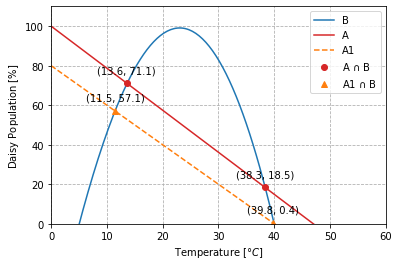

In [22]:
fig, ax = plt.subplots()
a_color = 'C3'
a1_color = 'C1'

# Plot out curves
ax.plot(temps, curve_b, color='C0', label='B')
ax.plot(temps, curve_a, color=a_color, label='A')
ax.plot(temps, curve_a1, color=a1_color, ls='--', label='A1')

ax.set_xlim(0., 60.)
ax.set_ylim(0., 110.)

ax.set_xlabel(r'Temperature [$\degree C$]')
ax.set_ylabel('Daisy Population [$\%$]')

ax.plot(temps[a_x_vals], curve_a[a_x_vals], ls='None', marker='o', color=a_color, label=r'A $\cap$ B')
ax.plot(temps[a1_x_vals], curve_a1[a1_x_vals], ls='None', marker='^', color=a1_color, label='A1 $\cap$ B')

for a, a1 in zip(a_x_vals, a1_x_vals):
    label_a = f'({temps[a]:.1f}, {curve_a[a]:.1f})'
    label_a1 = f'({temps[a1]:.1f}, {curve_a1[a1]:.1f})'
    
    ax.annotate(label_a, (temps[a], curve_a[a]), ha='center', xytext=(0,10), textcoords='offset points')
    ax.annotate(label_a1, (temps[a1], curve_a1[a1]), ha='center', xytext=(0,10), textcoords='offset points')
    
ax.legend()
ax.grid(ls='--')


fig.savefig('daisyworld_example.pdf', dpi=300., transparent=True)


In [23]:
# P7 - want to find curve for A (need surface temp) based on population
# R_n = (Qs + q)(1 - alpha) + Ld + Lu

def inv_stefan_boltzmann(energy, emissivity=1., sb_const=5.67e-8):
    """
    Solve for temperature from the stefan-boltzmann black body equation
    
    :param energy: energy [w m^-2]
    :param emissivity: emissivity coefficient
    :param sb_const: stefan-boltzmann constant
    :return: Temperature [K]
    """
    
    return (energy / (emissivity * sb_const)) ** .25

def alpha_sfc(daisy_pop, alpha_d=.5392, alpha_e=.120):
    """
    Calculate albedos based on daisy population
    
    :param daisy_pop: Coverage of daisies, ranging from 0-100(%)
    :param alpha_d: Albedo of daisies
    :param alpha_e: Albedo of earth
    :return: Albedos for earth with respect to daisy population 
    """
    
    return (daisy_pop * alpha_d + (100 - daisy_pop) * alpha_e) / 100.

def solve_t_sfc(q_dir, ap_a, alpha, e):
    """
    Calculate surface temperature for daisy world
    
    :param q_dir: Direct incoming shortwave radiation
    :param q_diff: Diffuse incoming solar radiation
    :param ap_a: View factor for earth (sphere: .25)
    :param alpha: Albedos for daisy world with changing daisy population
    :param e: Emissivity for earth and flower
    :return: Surface temperatures with respect to changing albedos [deg C]
    """
    
    # Solve for incoming longwave radiation, assuming energy balance closes    
    l_u = 1 * (q_dir * ap_a) * (1 - alpha)
    
    # Calculate temperature
    t_sfc = inv_stefan_boltzmann(l_u, emissivity=e)
    
    return t_sfc - 273.15

# Set constants
e = .5
q_c = 1370.
ap_a = .25 # Sphere

# calculate incoming direct and diffuse radiation
q_s = q_c

# Get alpha values for different daisy populations (0-100)
daisy_pop = np.linspace(0., 100., 200.)
alpha = alpha_sfc(daisy_pop)

# Calculate surface temperature
t_sfc = solve_t_sfc(q_c, ap_a, alpha, e)

# Calculate polynomial coefficients for derived equation
p_a_derived = np.polyfit(t_sfc, daisy_pop, 2)
curve_a_derived = np.polyval(p_a_derived, temps)
curve_a_diff = curve_a_derived - curve_a
max_x_coord = np.argmax(curve_a_diff)

# https://stackoverflow.com/questions/17197492/is-there-a-library-function-for-root-mean-square-error-rmse-in-python
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

cutoff_48 = np.where(temps > 48.)[0][0]
curve_a_rmse = rmse(curve_a_derived[:cutoff_48], curve_a[:cutoff_48])

with np.printoptions(precision=2, suppress=True):
    print(np.array(curve_a_rmse))
    print(p_a_derived)
    


5.370692199468236
[-0.01 -1.58 99.86]


C:\Users\moo90\Anaconda3\lib\site-packages\ipykernel_launcher.py:57: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


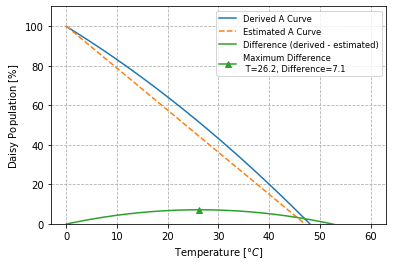

In [24]:
fig, ax = plt.subplots()

ax.plot(temps, curve_a_derived, label='Derived A Curve')
ax.plot(temps, curve_a, ls='--', label='Estimated A Curve')
ax.plot(temps, curve_a_diff, label='Difference (derived - estimated)')
ax.plot(temps[max_x_coord], curve_a_diff[max_x_coord], 
        marker='^', color='C2', 
        label=f'Maximum Difference \n T={temps[max_x_coord]:.1f}, Difference={curve_a_diff[max_x_coord]:.1f}')
ax.legend(fontsize='small')
ax.set_ylim(0, 110)

ax.set_xlabel(r'Temperature [$\degree C$]')
ax.set_ylabel('Daisy Population [$\%$]')

ax.grid(ls='--')

fig.savefig('derived_b_curve.pdf', dpi=300., transparent=True)